# Introduction

   In this project I will be modeling the spread of a contagious disease, which is very fitting for the times that we're in. Over the last year, we've been in the middle of global pandemic at the hands of COVID-19, labeled as the coronavirus. COVID-19 has confiscated many lives and was once taken very lightly by different people in our communities. After this past year it's clear to see that the impact of Coronavirus has been devastating and tragic, claiming approximately 2.8 million lives. In addition, there have been 128 Million cases worldwide. Even though many have recovered, the disease has left many individuals immune systems in shambles targeting major organs. Some countries were more prepared than others to handle such an outbreak which highlights that certain countries need to put major focus in epidemiology. If there were certain policies and preventative measures set in place, it's very possible that the spread of the virus could've been better contained.
   
   The goal of this project is to develop a general model to discover how different characteristics of a disease impacts the scope of a pandemic. I will be using a few elements such as the probability of getting infected, $pi$, and the probability of recovering, $pr$, to simulate the spread of a disease with respect to the size of the population of people. I am also going to explore the effects of a vaccine being introduced to the population. In this project, the probability of getting sick, $1-(1-pi)^k$, is modeled after a geometric distribution. I will create an `epidemic` function to actually execute the simulation. The purpose of `epidemic` is to describe the activity of how an infected cell would interact with the healthy cells around it, with each cell representing a person.
   
  To begin this project, I will create a $200 X 200$ to coordinate each cell as healthy individuals. We're going to initialize a $4X4$ grid which equates to 16 cells as the "patient zeros" so to speak, of the pandemic.  With the creation of the function `epidemic`, I'll be able to model the spread of the disease using the array of points, probability of infection ($pi$), and the probability of recovery$(pr)$. Then I’m going to animate the spread of the virus using a specific color map to differentiate healthy cells from infected and recovered cells. After testing different infection and recovery parameters, then we're going to introduce a vaccine to analyze the effectiveness in slowing down the spread of the disease. After experimenting with all of these parameters I’m going to finalize my thoughts after analyzing the different parameters.


In [13]:
### Importing neccessary packages to create the pandemic model
%matplotlib notebook
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

In [14]:
WholeGrid= np.zeros((201,201), dtype=int) # Creates grid of zeros
WholeGrid[98:103,98:103]=1 # Creates a four by four grid of infected cells

## Part One: Creation of `Epidemic` Function

The purpose of the `Epidemic` function so to check the health status of each cell as the pandemic continues to evolve. The function will calculate the probability each cell gets infected. Each cell is initially labeled as a $0$ to indicate that the cell is healthy. As the virus spreads, we're going to use, $1$, identify sick cells and $2$ to label cells that have recovered from infection. Eventually when the vaccine is introduced, cells that are vaccinated would be represented by a $-1$. When `Epidemic` is called, it will randomly calculate the probability of infection and recovery of the neighboring cells.

In [15]:
def epidemic(WholeGrid,pi,pr): #Defines function,with a grid of healthy cells, 
                                # infection and recovery probability
    
    b=np.copy(WholeGrid)       #copys the grid of zeros
    for i in range(1,201):     # Values of i from (1-200) which indicate the rows                        
        for j in range(1,201):  # Values of j from (1-200) which indicate the columns
            if WholeGrid[i,j]==0:   #Set healthy cells to zero
                cells= b[i-1:i+2,j-1:j+2]   #calculates the number of cells around the center..... only sum the k =1
                a=cells==1
                k=cells[a].sum()
                sick = 1-(1-pi)**k     # probability of a cell to get sick based on the neighboring cells
                p=random.random()       # Generates a random proability from a unifrom distribution from 0 to 1
                
                if p<sick:                    #  p less than the probability a cell will get sick the following day
                    b[i,j] += 1                 # Then the cell becomes infected and the cell becomes a one
                
            if WholeGrid[i,j]==1:                       # If the cell is already sick(=1)
                recov = random.random()         # Generates a random probability for recovery between 0 and 1
                if recov<pr:                   # If recovery is less than the probability of recovery
                    b[i][j]= 2                 #  the cell recovers and changes it to 2.
                
                
    return b             #Returns modified grid
                
                

## Part Two: `Epidemic` Animation

After creating the `Epidemic` function we will now animate it so we can visualize the spread of the disease given the infection rate and rate of recovery. The ability to visualize the spread of the disease allows us to really put into perspective how devastating the virus is. Both The probability of infection and the probability of recovery were set to $50\% $ in the spirit of consistency. Initially, all of the cells will be green since they're healthy and they'll turn orange when they become sick. After they've recovered from the disease, the cells will turn black.

<IPython.core.display.Javascript object>


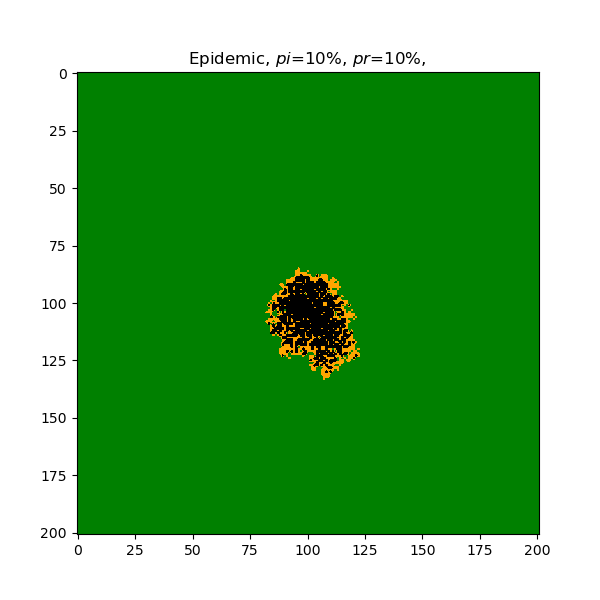

In [16]:
x = np.zeros((201,201), dtype = int)        # creates grid
x[98:103,98:103]=1                          # Create the center for the initial infected cells

fig = plt.figure(figsize = (6,6))           # figure for the animation
ax = plt.subplot(111)                       # create subplot
plt.title("Epidemic, $pi$=10%, $pr$=10%,", fontsize=12) #heading of the graph
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black']) # Color map to identify different type of cells
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)
                                

def animate(i):              # Define animate finction
    global x                 # make x a global variable

    x=epidemic(x,pi=0.1,pr=0.1)               # assign the epidemic function as x (pi = 10%, pr = 10%)
    im.set_data(x)                       # updates the plot according to the color map
    return im                            # returns the updated plot


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

### Note: I initially created the visualization of the virus using the probability rate of infection at $10\%$ and the rate of recovery also at $10\%$. The spread consistently spreads outwards from the center with the recovery rate following along. The virus eventually effects the whole grid but is followed by recovery at a similar rate. The infection spreads a little faster though. The animation looks topographical with layers, making it really come to life.

## Part Three: Explore the effects of the model parameters $pi$ and $pr$ on the spread of the disease.

The next objective after producing the general animation of the `epidemic` is to explore varying rates in both the probability of infection and recovery. I'm going to explore conditions where the infection rate is extremely high with a low recovery rate and vise versa. in addition to the extreme rates, I’m also going to analyze the rates when they are close in probability. I'm going to explore six cases to observe the effects of the pandemic.

### Potential Cases
1. $pi = 99\%$, $pr = 1\%$
2. $pi = 99\%$, $pr = 90\%$
3. $pi = 50\%$, $pr = 50\%$
4. $pi = 30\%$, $pr = 60\%$
5. $pi = 3\%$, $pr = 10\%$
6. $pi = 18\%$, $pr = 8\%$

#### Example 1: $pi = 99\%$, $pr = 1\%$

<IPython.core.display.Javascript object>


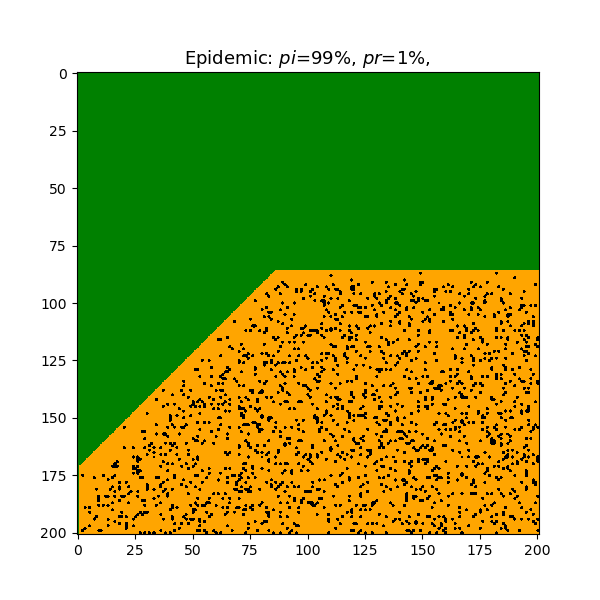

In [17]:
x = np.zeros((201,201), dtype = int)        # creates grid
x[98:103,98:103]=1                          # Create the center for the initial infected cells

fig = plt.figure(figsize = (6,6))           # figure for the animation
ax = plt.subplot(111)                       # create subplot
plt.title("Epidemic: $pi$=99%, $pr$=1%,", fontsize=13) #heading of the graph
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black']) # Color map to identify different type of cells
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)
                                

def animate(i):              # Define animate finction
    global x                 # make x a global variable

    x=epidemic(x,0.99,0.01)               # assign the epidemic function as x (pi = 99%, pr = 1%)
    im.set_data(x)                       # updates the plot according to the color map
    return im                            # returns the updated plot


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

### Note: The Infection spreads instantly and recovers very slowly. There's an instant orange spread of the infection with an extremely slow rate of recovery as the grid turns black

#### Example 2: $pi = 99\%$, $pr = 90\%$

<IPython.core.display.Javascript object>


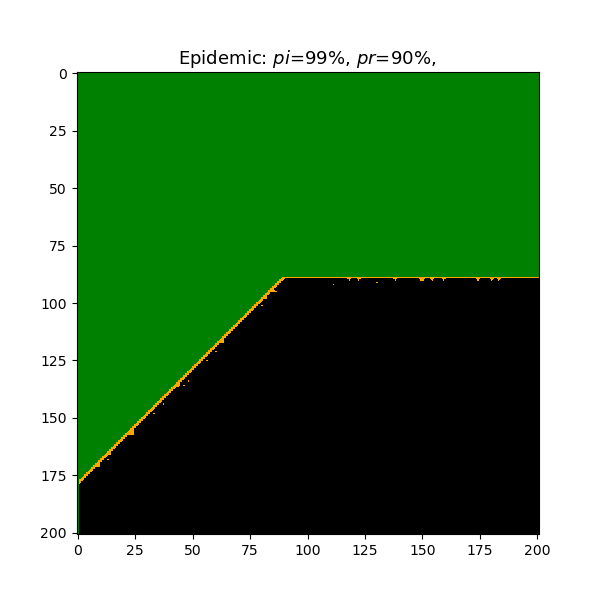

In [18]:
x = np.zeros((201,201), dtype = int)        # creates grid
x[98:103,98:103]=1                          # Create the center for the initial infected cells

fig = plt.figure(figsize = (6,6))           # figure for the animation
ax = plt.subplot(111)                       # create subplot
plt.title("Epidemic: $pi$=99%, $pr$=90%,", fontsize=13) #heading of the graph
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black']) # Color map to identify different type of cells
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)
                                

def animate(i):              # Define animate finction 
    global x                 # make x a global variable

    x=epidemic(x,0.99,0.90)               # assign the epidemic function as x (pi = 99%, pr = 90%)
    im.set_data(x)                       # updates the plot according to the color map
    return im                            # returns the updated plot


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

### Note: The orange starts a small blob and instantly spreads out, but the black also instantly recovers. There's only a small period of time between the event of an infection and the subsequent recovery.

#### Example 3: $pi = 50\%$, $pr = 50\%$

<IPython.core.display.Javascript object>


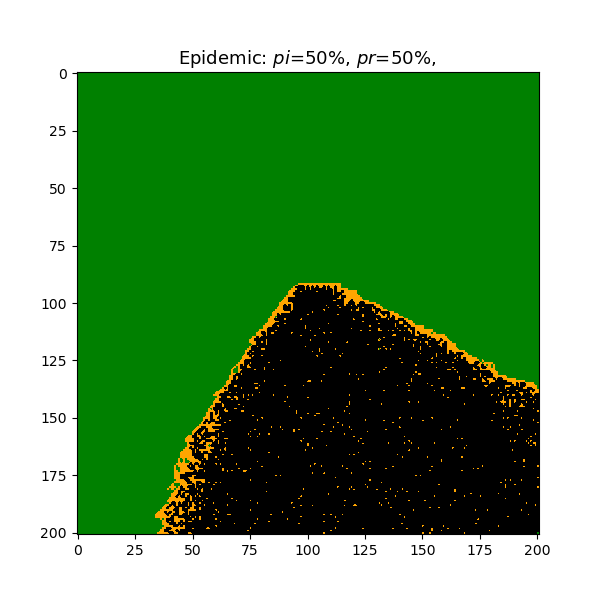

In [19]:
x = np.zeros((201,201), dtype = int)        # creates grid
x[98:103,98:103]=1                          # Create the center for the initial infected cells

fig = plt.figure(figsize = (6,6))           # figure for the animation
ax = plt.subplot(111)                       # create subplot
plt.title("Epidemic: $pi$=50%, $pr$=50%,", fontsize=13) #heading of the graph
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black']) # Color map to identify different type of cells
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)
                                

def animate(i):              # Define animate finction
    global x                 # make x a global variable

    x=epidemic(x,0.5,0.5)               # assign the epidemic function as x (pi = 50%, pr = 50%)
    im.set_data(x)                       # updates the plot according to the color map
    return im                            # returns the updated plot


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

### Note: During the initial start of the epidemic, there are a lot of cells who are infected in the middle of plenty of people who have already recovered. Eventually the rate of recovery and infection grows constant in unison.

#### Example 4: $pi = 30\%$, $pr = 60\%$

<IPython.core.display.Javascript object>


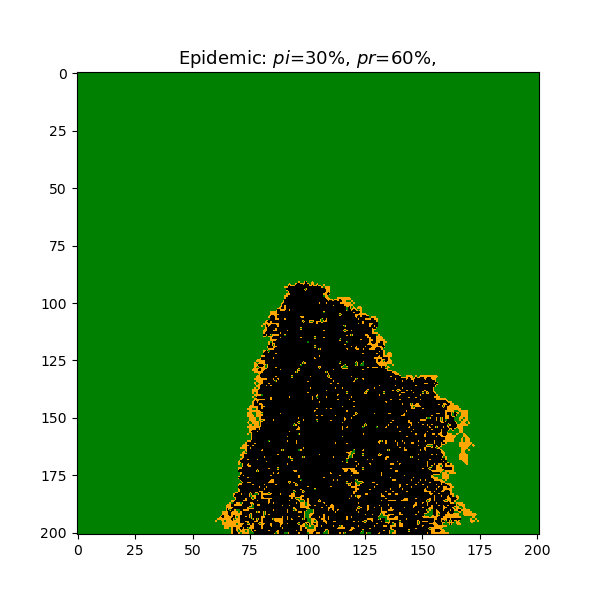

In [20]:
x = np.zeros((201,201), dtype = int)        # creates grid
x[98:103,98:103]=1                          # Create the center for the initial infected cells

fig = plt.figure(figsize = (6,6))           # figure for the animation
ax = plt.subplot(111)                       # create subplot
plt.title("Epidemic: $pi$=30%, $pr$=60%,", fontsize=13) #heading of the graph
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black']) # Color map to identify different type of cells
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)
                                

def animate(i):              # Define animate finction
    global x                 # make x a global variable

    x=epidemic(x,0.3,0.6)               # assign the epidemic function as x (pi = 30%, pr = 60%)
    im.set_data(x)                       # updates the plot according to the color map
    return im                            # returns the updated plot


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

### Note: The spread of the infection is relatively slow compared to the rate at which the cells are recovering, slowing the spread of the virus and its effectiveness

#### Example 5: $pi = 3\%$, $pr = 10\%$

<IPython.core.display.Javascript object>


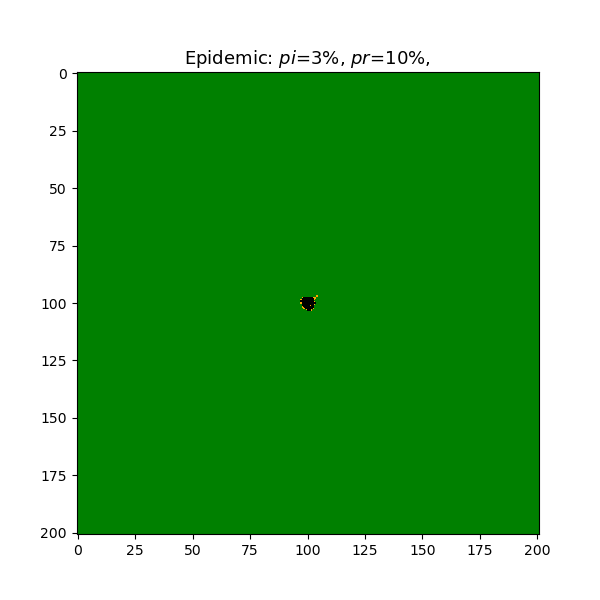

In [21]:
x = np.zeros((201,201), dtype = int)        # creates grid
x[98:103,98:103]=1                          # Create the center for the initial infected cells

fig = plt.figure(figsize = (6,6))           # figure for the animation
ax = plt.subplot(111)                       # create subplot
plt.title("Epidemic: $pi$=3%, $pr$=10%,", fontsize=13) #heading of the graph
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black']) # Color map to identify different type of cells
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)
                                

def animate(i):              # Define animate finction
    global x                 # make x a global variable

    x=epidemic(x,0.03,0.1)               # assign the epidemic function as x (pi = 3%, pr = 10%)
    im.set_data(x)                       # updates the plot according to the color map
    return im                            # returns the updated plot


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

#### Note: The infection spreads extremely slow as represented by orange. The cells are recovering more quickly then the rate of infection, there's barely any significant spread at once which means the number of active cases is signficantly lower than that in example 1.

#### Example 6: $pi = 18\%$, $pr = 8\%$

<IPython.core.display.Javascript object>


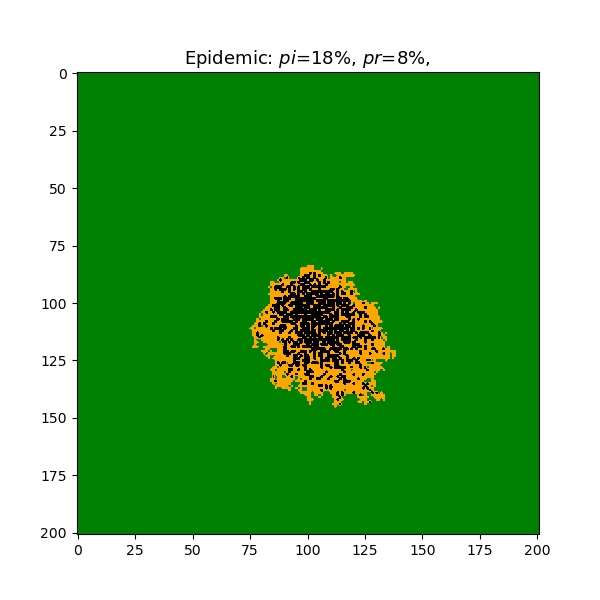

In [22]:
x = np.zeros((201,201), dtype = int)        # creates grid
x[98:103,98:103]=1                          # Create the center for the initial infected cells

fig = plt.figure(figsize = (6,6))           # figure for the animation
ax = plt.subplot(111)                       # create subplot
plt.title("Epidemic: $pi$=18%, $pr$=8%,", fontsize=13) #heading of the graph
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black']) # Color map to identify different type of cells
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)
                                

def animate(i):              # Define animate finction
    global x                 # make x a global variable

    x=epidemic(x,0.18,0.08)               # assign the epidemic function as x (pi = 18%, pr = 8%)
    im.set_data(x)                       # updates the plot according to the color map
    return im                            # returns the updated plot


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

#### Note: In the final graph we could see the relatively slow spread of the virus. with an even slower rate of recovery

## Part 4: Vaccine Introduction

After visualizing how the virus spreads with different ranges in the parameters, we're going to introduce a vaccine to the cells to simulate immunity. I'm going to define a function `vaccine`, to carry out introducing the vaccine to the population. The only parameters will be the probability of vaccination and the grid to represent these vaccinated cells. The color of the vaccinated cells will be represented by pale green as the assigned value is a $-1$. We will have the ability so set the proportion of the population who are vaccinated.


In [11]:
def vaccine(WholeGrid,pv):                        # Defines function
    for i in range(1,201):                 # all of the rows
        for j in range(1,201):             # all of the columns
            if WholeGrid[i,j]==0:                  # a condition for if the cell is healthy
                vaccine = random.random()    # Generates a random number vaccine proability  between 0 and 1
                if vaccine < pv:              # If p_vac is less than the probability of being vaccinated                       # If p_V is 10%, we can expect around 10% of the cells to be vaccinated
                    WholeGrid[i,j]=-1             # Change the cell to -1 (i.e. vaccinated)
    return WholeGrid                               # return the array

<IPython.core.display.Javascript object>


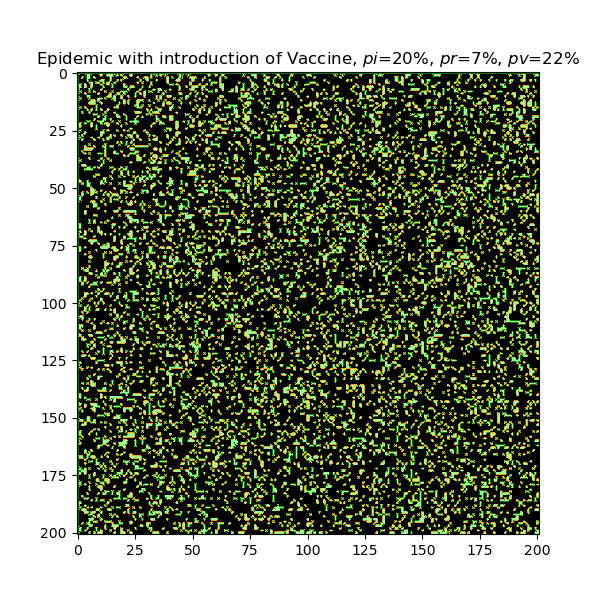

In [23]:
x = np.zeros((201,201), dtype = int)        # iitialize the array
x[98:102,98:102]=1                          # Create the center 16 initial infected cells

fig = plt.figure(figsize = (6,6))           # set up figure for the animation
ax = plt.subplot(111)                       # set up a subplot
plt.title("Epidemic with introduction of a Vaccine, $pi$=20%, $pr$=7%, $pv$=22%")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)
                                # displays array as colored pixels
x=vaccine(WholeGrid,0.22)             # Incorporates the vaccine in the array at 22%

def animate(i):              # input i  
    global x                 # treat x as a global variable

    x=epidemic(x,0.20,0.07)               # tells us how to update the array x (pi = 20%, pr = 7%)
    im.set_data(x)                       # updates the data in the im plot
    return im                            # returns im


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

### Note: We're able to see the Immediate impact of the vaccine as many of the cells are immune to the virus already. I set the percentage of cells that are vaccinated equal to $22\%$, with an infection rate of $20\%$ and a recovery rate of $7\%$. We can see that since some of the cells are immune it's harder for the disease to spread which also allows the recovery rate to work faster although it's low relative to the infection rate.

## Conclusion


The main purpose of this project was to study the effects and reactions of a particular disease given certain parameters. Those parameters being the probability of infection, the probability of recovery, and the introduction of a vaccine to the population. Through analysis it was clear that the relationship between the values of $pi$ and $pr$ is significant in determining the amount of cases at any give point in time. The higher the $pi$,relative to the $pr$, the longer it took for the cells to fully recover which is severely evident in the first case in part three of the project. It's extremely important to understand the dynamics of a contagious disease which modelling allows us to do. However, these models are lacking other key variables that are unaccounted for when dealing with a pandemic, such as mortality rates(if lethal) and we assume all cells fully recover. we can still simulate the potential for the disease with the basic parameters that I’ve presented above. Initially I experimented with the rates being drastically different, making either the virus more powerful or the recovery rates. In both events we saw massive swarms of orange and black, representing the infection rate and the recovery rate respectively. If the recovery rate was too low, the number of active cases were significantly higher over a longer period of time. When the infection rate was extremely small, the cells were instantly recovering from the disease.

As mentioned previously, Although this model omits certain key factors, this project still has the potential to be resourceful to identify the severity of a disease given certain conditions. The data from this project can be used to gain clarity and prepare for the future to help avoid another global crisis such as the one we're currently in. I believe an accurate representation of the first couple of weeks of the COVID-19 pandemic is similar to the first example in terms of the infection rate. When the vaccine is introduced, we see the impact and the slowing of the spread of the disease as some people gain an immunity from the virus. The disease doesn't spread as easily. This information can greatly benefit any medical company or agency to help contain the spread of the virus. Through the modeled examples above, it's clear that with a successful vaccine, we can help eliminate the rise of an epidemic.
